In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_excel("./Datasets/HVAC_limpio.xlsx", "HVAC_limpio", index_col=0)
#data

In [3]:
data['Fecha- hora de lectura'] = (data['Fecha- hora de lectura'] - data['Fecha- hora de lectura'].min())  / np.timedelta64(1,'D')
#data.drop(['Fecha- hora de lectura'], axis=1, inplace=True)

In [4]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim != None:
        plt.ylim(*ylim)
    plt.xlabel("Training samples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Train score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score")

    plt.legend(loc="best")
    return plt

In [5]:
from sklearn.ensemble import RandomForestRegressor

def randomForestRegressor(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    regr = RandomForestRegressor(n_estimators=10)
    regr.fit(X_train, y_train)
    predicts = regr.predict(X_test)
    acc = regr.score(X_test, y_test)
    mse = mean_squared_error(y_test, predicts)
    print("Accuracy: ", acc)
    print("MSE: ", mse)
    print("---------------------------------------")
    #print(predicts.tolist())
    #print(y_test.tolist())
    return regr

## POTENCIA BOMBA CALOR CARLOS

In [6]:
X = data[['TEMPERATURA SALIDA BOMBA CALOR CARLOS','POTENCIA TERMICA BOMBA CALOR CARLOS', 
          'C_O_P BOMBA CALOR CARLOS', 'POTENCIA TRAFO 4','POTENCIA TRAFO 5',
          'TEMPERATURA EXTERIOR', 'TEMPERATURA AMBIENTE BOMBA CALOR CARLOS' ]]
y = data['POTENCIA BOMBA CALOR CARLOS']
regrCalorCarlos = randomForestRegressor(X, y)

Accuracy:  0.9934345219046498
MSE:  12.578359123183718
---------------------------------------


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

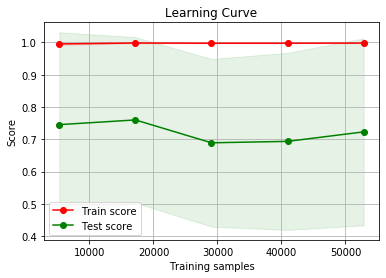

In [10]:
plot_learning_curve(regrCalorCarlos, "Learning Curve", X, y)

## POTENCIA BOMBA CALOR FELIPE

In [7]:
X = data[['TEMPERATURA SALIDA BOMBA CALOR FELIPE','POTENCIA TERMICA BOMBA CALOR FELIPE', 
          'C_O_P BOMBA CALOR FELIPE', 'POTENCIA TRAFO 4','POTENCIA TRAFO 5',
          'TEMPERATURA EXTERIOR', 'TEMPERATURA AMBIENTE BOMBA CALOR FELIPE' ]]
y = data['POTENCIA BOMBA CALOR FELIPE']
regrCalorFelipe = randomForestRegressor(X, y)

Accuracy:  0.9869380540729976
MSE:  27.012775579378015
---------------------------------------


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

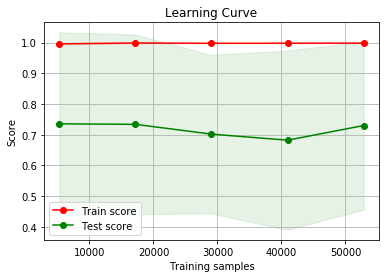

In [11]:
plot_learning_curve(regrCalorFelipe, "Learning Curve", X, y)

## POTENCIA GRUPO FRÍO 1

In [8]:
X = data[['POTENCIA TERMICA GRUPO FRIO 1', 'ENTRADA AGUA A TORRE 1', 'SALIDA AGUA TORRE 1',
          'POTENCIA TRAFO 4', 'POTENCIA TRAFO 5', 'POTENCIA MEDIA CONECTADA', 'CONTROL FRÍO',
          'KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1', 'TEMPERATURA EXTERIOR']]
y = data['POTENCIA GRUPO FRÍO 1']
regrGrupo1 = randomForestRegressor(X, y)

Accuracy:  0.9740031145997287
MSE:  18.63108567548856
---------------------------------------


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

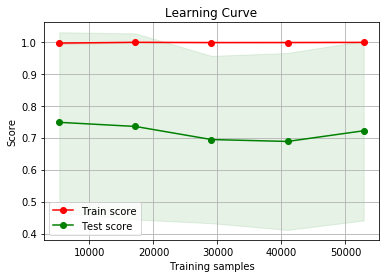

In [12]:
plot_learning_curve(regrGrupo1, "Learning Curve", X, y)

## POTENCIA GRUPO FRÍO 2

In [9]:
X = data[['POTENCIA TERMICA GRUPO FRIO 2', 'ENTRADA AGUA A TORRE 1', 'SALIDA AGUA TORRE 2',
          'POTENCIA TRAFO 4', 'POTENCIA TRAFO 5', 'POTENCIA MEDIA CONECTADA', 'CONTROL FRÍO',
          'KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2', 'TEMPERATURA EXTERIOR']]
y = data['POTENCIA GRUPO FRÍO 2']
regrGrupo2 = randomForestRegressor(X, y)

Accuracy:  0.9891397663741417
MSE:  8.80519114906382
---------------------------------------


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

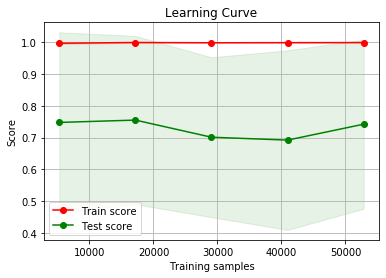

In [13]:
plot_learning_curve(regrGrupo2, "Learning Curve", X, y)